In [135]:
import os
import os.path
import pandas as pd
import pylab as plt
from matplotlib_venn import venn2
import numpy as np
%matplotlib inline

In [136]:
clust_results_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/clust_results/by_species/Ensembl_March2019/"
clust_results = os.listdir(clust_results_dir)
clust_results

['Results_04_Mar_19_Folivaceous',
 '.DS_Store',
 'Results_04_Mar_19_Frathbuni',
 'Results_04_Mar_19_Fsimilis',
 'Results_04_Mar_19_Fnotatus',
 'Results_04_Mar_19_Fzebrinus',
 'Results_04_Mar_19_Lgoodei',
 'Results_04_Mar_19_Fparvapinis',
 'Results_04_Mar_19_Fsciadicus',
 'Results_04_Mar_19_FheteroclitusMDPL',
 'Results_04_Mar_19_Lparva',
 'Results_04_Mar_19_Fchrysotus',
 'Results_04_Mar_19_FheteroclitusMDPP',
 'Results_04_Mar_19_Axenica',
 'Results_04_Mar_19_Fcatanatus',
 'Results_04_Mar_19_Fdiaphanus',
 'Results_04_Mar_19_Fgrandis']

In [137]:
species_data = {}
for i in clust_results:
    if i != ".DS_Store":
        species = i.split("_")[-1]
        print(species)
        results_files = os.listdir(clust_results_dir+i)
        clusters_file = [x for x in results_files if x=="Clusters_Objects.tsv"][0]
        clusters = pd.read_csv(clust_results_dir + i + "/" + clusters_file,skiprows=0,sep="\t")
        clusters = clusters.iloc[1:]
        data_files = os.listdir(clust_results_dir + i + "/Processed_Data/")
        data_file = [x for x in data_files if x.endswith(".tsv")][0]
        data = pd.read_csv(clust_results_dir + i + "/Processed_Data/"+data_file,sep="\t",index_col=0)
        species_data[species] = [clusters,data]                       

Folivaceous
Frathbuni
Fsimilis
Fnotatus
Fzebrinus
Lgoodei
Fparvapinis
Fsciadicus
FheteroclitusMDPL
Lparva
Fchrysotus
FheteroclitusMDPP
Axenica
Fcatanatus
Fdiaphanus
Fgrandis


In [138]:
data.head()

,15_ppt,0.2_ppt,transfer
Genes,,,
ENSFHEP00000000003,-1.196918,1.250793,-0.053875
ENSFHEP00000000004,1.157539,0.124848,-1.282387
ENSFHEP00000000005,0.832399,0.573918,-1.406318
ENSFHEP00000000007,0.348049,1.013050,-1.361099
ENSFHEP00000000008,0.486407,0.906821,-1.393228


In [139]:
clusters.head()

,C0 (2318 genes),C1 (1896 genes),C2 (1846 genes),C3 (1202 genes),C4 (1219 genes),C5 (1501 genes),C6 (2308 genes),C7 (1822 genes),C8 (1175 genes),C9 (1154 genes),C10 (1687 genes),C11 (1973 genes)
1,ENSFHEP00000000021,ENSFHEP00000000013,ENSFHEP00000000009,ENSFHEP00000000043,ENSFHEP00000000010,ENSFHEP00000000014,ENSFHEP00000000057,ENSFHEP00000000003,ENSFHEP00000000011,ENSFHEP00000000076,ENSFHEP00000000005,ENSFHEP00000000004
2,ENSFHEP00000000025,ENSFHEP00000000015,ENSFHEP00000000018.1,ENSFHEP00000000046,ENSFHEP00000000054,ENSFHEP00000000026.1,ENSFHEP00000000063,ENSFHEP00000000034,ENSFHEP00000000037,ENSFHEP00000000120.1,ENSFHEP00000000008,ENSFHEP00000000039
3,ENSFHEP00000000029,ENSFHEP00000000017.1,ENSFHEP00000000023.1,ENSFHEP00000000051,ENSFHEP00000000071,ENSFHEP00000000110,ENSFHEP00000000078,ENSFHEP00000000056,ENSFHEP00000000088,ENSFHEP00000000132,ENSFHEP00000000038,ENSFHEP00000000049
4,ENSFHEP00000000035,ENSFHEP00000000020.1,ENSFHEP00000000053,ENSFHEP00000000166,ENSFHEP00000000138,ENSFHEP00000000111,ENSFHEP00000000101,ENSFHEP00000000067,ENSFHEP00000000107,ENSFHEP00000000198,ENSFHEP00000000045,ENSFHEP00000000050
5,ENSFHEP00000000052,ENSFHEP00000000024.1,ENSFHEP00000000055,ENSFHEP00000000171.1,ENSFHEP00000000153.1,ENSFHEP00000000134,ENSFHEP00000000115,ENSFHEP00000000114,ENSFHEP00000000148,ENSFHEP00000000223,ENSFHEP00000000080,ENSFHEP00000000060


# how to connect clusters in each species?

In [140]:
#BW,FW,TR:
#down,neutral,up
#F_catanatus: C5
#F_rathbuni: C1
#L_goodei: C5
#F_sciadicus: C11
#F_olivaceus: C11
#F_notatus: C5

#Now, go find the genes in these clusters, and plot them, put them all in a dataframe with categories 

In [141]:
cluster_genes = {}
downzeroup_cluster = {"Fcatanatus": "C5",
              "Frathbuni": "C1",
              "Lgoodei": "C5",
              "Fsciadicus": "C11",
              "Folivaceous": "C11",
              "Fnotatus": "C5"}
for species in downzeroup_cluster:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fcatanatus
Frathbuni
Lgoodei
Fsciadicus
Folivaceous
Fnotatus


In [142]:
a = set(cluster_genes['Fcatanatus'].iloc[:,0].tolist())
len(a)

317

In [143]:
b = set(cluster_genes['Frathbuni'].iloc[:,0].tolist())
len(b)

1839

In [144]:
gene_list_common = list(a | b)
print(len(gene_list_common))

2130


In [145]:
gene_list_common.extend(gene_list_common)

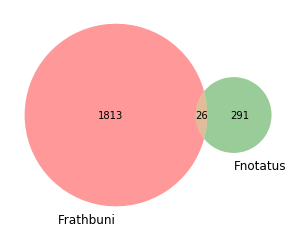

In [146]:
venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Frathbuni',species))
plt.show()

317


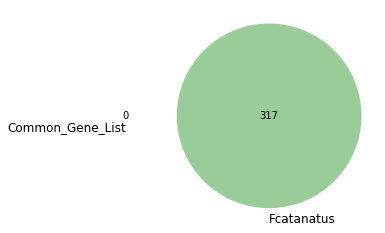

2130


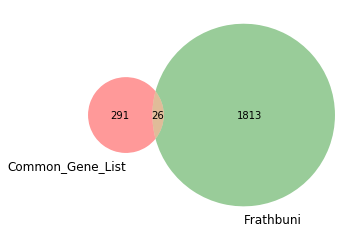

2575


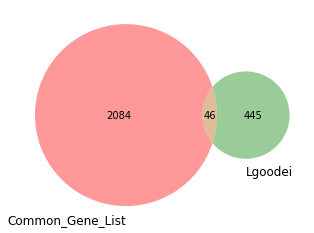

2824


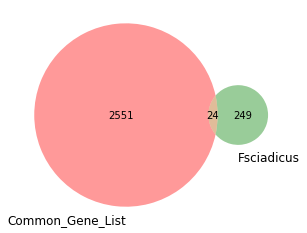

3320


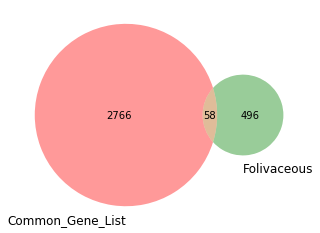

3686


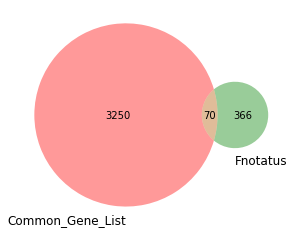

In [147]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [148]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

7372
3686


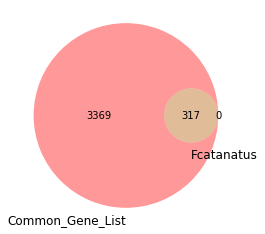

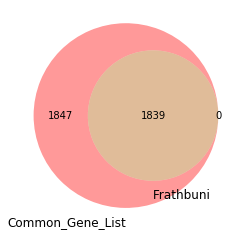

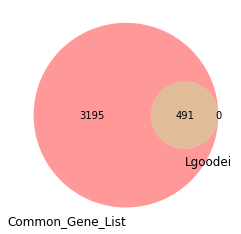

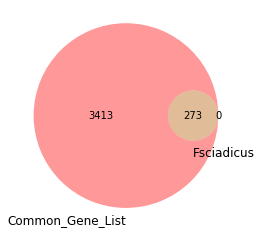

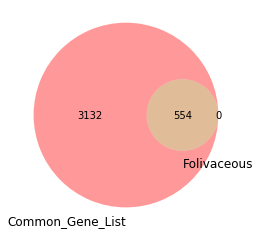

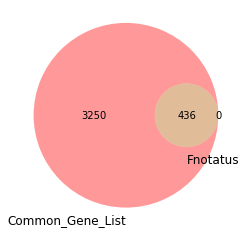

In [149]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [150]:
each_common

[['ENSFHEP00000004429',
  'ENSFHEP00000021048.1',
  'ENSFHEP00000003421',
  'ENSFHEP00000022225.1',
  'ENSFHEP00000019126',
  'ENSFHEP00000020869',
  'ENSFHEP00000032835',
  'ENSFHEP00000002641',
  'ENSFHEP00000021317',
  'ENSFHEP00000018876.1',
  'ENSFHEP00000028625.1',
  'ENSFHEP00000027550',
  'ENSFHEP00000004276.1',
  'ENSFHEP00000002662',
  'ENSFHEP00000001933',
  'ENSFHEP00000015181.1',
  'ENSFHEP00000018158',
  'ENSFHEP00000028059.1',
  'ENSFHEP00000011250',
  'ENSFHEP00000033365',
  'ENSFHEP00000023616',
  'ENSFHEP00000006857.1',
  'ENSFHEP00000015016.1',
  'ENSFHEP00000002602',
  'ENSFHEP00000002897',
  'ENSFHEP00000019032',
  'ENSFHEP00000000368',
  'ENSFHEP00000029695',
  'ENSFHEP00000023132',
  'ENSFHEP00000026966',
  'ENSFHEP00000017658',
  'ENSFHEP00000013407',
  'ENSFHEP00000017804',
  'ENSFHEP00000006932',
  'ENSFHEP00000010718',
  'ENSFHEP00000021739',
  'ENSFHEP00000010716',
  'ENSFHEP00000023071',
  'ENSFHEP00000031532.1',
  'ENSFHEP00000025728',
  'ENSFHEP0000000835

In [151]:
set.intersection(*map(set,each_common))

set()

### Therefore, the down-zero-up pattern is not conserved across all freshwater species. What about in clade?

### Clade 1

In [152]:
cluster_genes = {}
downzeroup_cluster_clade1 = {"Fcatanatus": "C5",
              "Frathbuni": "C1"}
downzeroup_cluster_clade3 = {"Fsciadicus": "C11",
              "Folivaceous": "C11",
              "Fnotatus": "C5"}
for species in downzeroup_cluster_clade1:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fcatanatus
Frathbuni


317


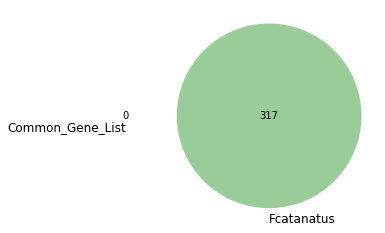

2130


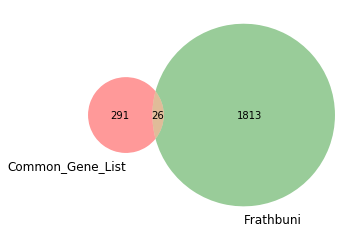

In [153]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [154]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

4260
2130


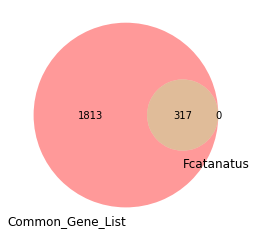

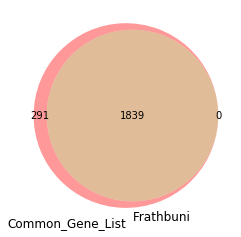

In [155]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [156]:
a = set.intersection(*map(set,each_common))

In [157]:
len(a)

26

In [158]:
b = pd.DataFrame(list(a),columns = ['ensembl_peptide_id'])

In [159]:
b.head()

,ensembl_peptide_id
0,ENSFHEP00000009904
1,ENSFHEP00000011250
2,ENSFHEP00000007707
3,ENSFHEP00000020341
4,ENSFHEP00000033641


In [160]:
b.shape

(26, 1)

In [161]:
c = pd.read_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/Ensembl_annotations.csv",index_col=0)

In [162]:
c.head()

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
1,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0016020,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
2,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0016021,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
3,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0055114,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
4,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0005739,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0
5,ENSFHEP00000000002,ENSFHET00000000007,ENSFHEG00000000007,protein_coding,ND1,GO:0016491,NADH dehydrogenase subunit 1 [Source:NCBI gene...,7668434.0


In [163]:
d = pd.merge(b,c,on="ensembl_peptide_id",how="left")

In [164]:
d.shape

(49, 8)

In [165]:
d

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
0,ENSFHEP00000009904,ENSFHET00000030988,ENSFHEG00000011219,protein_coding,spopla,NaN,speckle type BTB/POZ protein like [Source:NCBI...,105919189.0
1,ENSFHEP00000011250,ENSFHET00000018196,ENSFHEG00000012654,protein_coding,NaN,NaN,"TDP-glucose 4,6-dehydratase [Source:NCBI gene;...",105919362.0
2,ENSFHEP00000007707,ENSFHET00000003370,ENSFHEG00000008837,protein_coding,NaN,GO:0003677,DNA damage induced apoptosis suppressor [Sourc...,105930026.0
3,ENSFHEP00000020341,ENSFHET00000029829,ENSFHEG00000022285,protein_coding,rabl6b,NaN,"RAB, member RAS oncogene family like 6 [Source...",105915632.0
4,ENSFHEP00000033641,ENSFHET00000028122,ENSFHEG00000020881,protein_coding,mospd2,GO:0016020,motile sperm domain containing 2 [Source:NCBI ...,105933634.0
5,ENSFHEP00000033641,ENSFHET00000028122,ENSFHEG00000020881,protein_coding,mospd2,GO:0016021,motile sperm domain containing 2 [Source:NCBI ...,105933634.0
6,ENSFHEP00000027863,ENSFHET00000016979,ENSFHEG00000011590,protein_coding,ap5b1,GO:0005623,adaptor related protein complex 5 subunit beta...,105940056.0
7,ENSFHEP00000027863,ENSFHET00000016979,ENSFHEG00000011590,protein_coding,ap5b1,GO:0016197,adaptor related protein complex 5 subunit beta...,105940056.0
8,ENSFHEP00000033365,ENSFHET00000027599,ENSFHEG00000020457,protein_coding,NaN,GO:0016787,dual specificity protein phosphatase 18-like [...,105926811.0
9,ENSFHEP00000033365,ENSFHET00000027599,ENSFHEG00000020457,protein_coding,NaN,GO:0016791,dual specificity protein phosphatase 18-like [...,105926811.0


In [175]:
desc = d.drop_duplicates('description')
desc['description']

0     speckle type BTB/POZ protein like [Source:NCBI...
1     TDP-glucose 4,6-dehydratase [Source:NCBI gene;...
2     DNA damage induced apoptosis suppressor [Sourc...
3     RAB, member RAS oncogene family like 6 [Source...
4     motile sperm domain containing 2 [Source:NCBI ...
6     adaptor related protein complex 5 subunit beta...
8     dual specificity protein phosphatase 18-like [...
17    N-acetylneuraminic acid phosphatase [Source:NC...
18    DNA polymerase subunit gamma-2, mitochondrial-...
19    membrane palmitoylated protein 1 [Source:NCBI ...
20    solute carrier organic anion transporter famil...
21    heterogeneous nuclear ribonucleoprotein U [Sou...
22    NADPH dependent diflavin oxidoreductase 1 [Sou...
23    SUMO1 activating enzyme subunit 1 [Source:NCBI...
25    6-phosphofructo-2-kinase/fructose-2,6-bisphosp...
26    probable ATP-dependent RNA helicase DDX5 [Sour...
31    armadillo repeat containing 6 [Source:NCBI gen...
32    protein arginine methyltransferase 9 [Sour

### Clade 3

In [166]:
cluster_genes = {}
downzeroup_cluster_clade1 = {"Fcatanatus": "C5",
              "Frathbuni": "C1"}
downzeroup_cluster_clade3 = {"Fsciadicus": "C11",
              "Folivaceous": "C11",
              "Fnotatus": "C5"}
for species in downzeroup_cluster_clade3:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fsciadicus
Folivaceous
Fnotatus


273


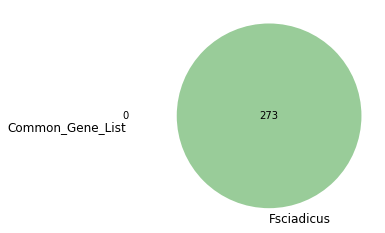

826


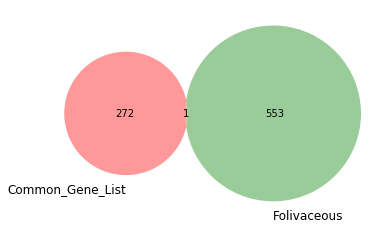

1236


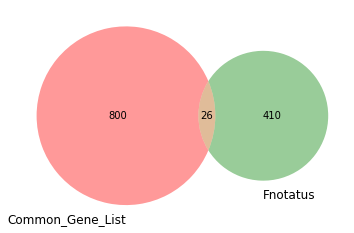

In [167]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [168]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

2472
1236


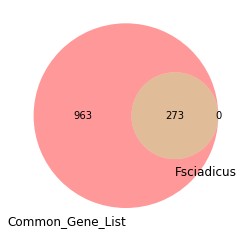

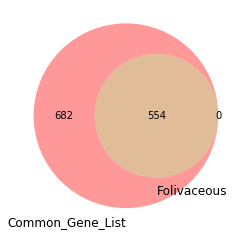

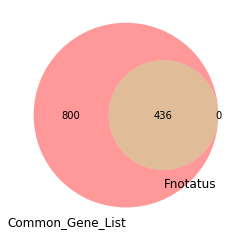

In [169]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [170]:
a = set.intersection(*map(set,each_common))

In [171]:
len(a)

0